# Notebook 1 — Primer contacto con R (sintaxis básica)

**Objetivo:** perder el miedo a R y practicar lo imprescindible: variables, tipos básicos y operaciones.

**Cómo trabajar:** ejecuta cada celda (Shift+Enter), lee el resultado y completa los ejercicios.

> 💡 Recomendación: si algo falla, lee el mensaje de error y revisa la línea indicada.


##  ¿Qué es R?

R es un **lenguaje de programación orientado al análisis de datos, estadística e Inteligencia Artificial**. A diferencia de otros lenguajes generales, R nació pensando en datos desde el primer día.

* **Origen académico:** Aparece en los 90, inspirado en el lenguaje S, para facilitar la investigación estadística.
* **Software libre:** Mantenido por la **R Foundation**, es gratuito y cuenta con una comunidad global masiva.
* **Filosofía:** R no nació para "programar apps", nació para **pensar con datos**.

### ¿Por qué R es clave en IA?

Aunque Python es muy popular, R sigue siendo el estándar en:

* 📊 **Análisis Exploratorio de Datos (EDA):** Es el más rápido para entender tus datos visualmente.
* 📈 **Estadística Avanzada:** Indispensable para validar modelos (tests de hipótesis, p-valores).
* 🤖 **Machine Learning Clásico:** Muchos algoritmos se publican en R antes que en cualquier otro lenguaje.

---

##  El entorno de desarrollo

Para trabajar profesionalmente en Machine Learning con R, necesitamos dos piezas que trabajan juntas: el **motor** y el **editor**.

### 1. El motor: R (El lenguaje)

Es el "cerebro" que hace los cálculos. Al instalarlo, preparas el compilador que entiende tus instrucciones.

* **Descarga:** Se instala desde el [CRAN](https://cran.r-project.org/).

### 2. El editor: ¿RStudio o VS Code?

Aquí es donde elegirás tu flujo de trabajo según tu perfil:

#### **Opción A: RStudio (El estándar de la industria)**

Es un entorno diseñado específicamente para datos. Todo está a la mano: tus variables, tus gráficos y tus scripts.

* **Ideal para:** Si te enfocas 100% en estadística, visualización avanzada y creación de reportes científicos.
* **Punto fuerte:** No requiere configuración; instalas y empiezas a programar.


<img src="img/rstudio-panes-labeled.jpeg" width="900" alt="rstudio-panes">

#### **Opción B: VS Code + Jupyter (El enfoque híbrido)**

Si ya vienes de Python o prefieres un editor moderno y ligero.

* **Ideal para:** Flujos de trabajo de **Machine Learning** donde mezclas lenguajes (Python, SQL, R) o prefieres trabajar con **Notebooks**.
* **Punto fuerte:** Los cuadernos de Jupyter permiten ejecutar bloques de código y ver los resultados (gráficos o tablas) justo debajo, facilitando la experimentación rápida.


---

### ¿Cómo se instala correctamente?

El orden de los factores sí altera el producto. Sigue estos pasos para evitar errores:

1. **Instala R primero:** Elige la versión para tu sistema operativo.
2. **Instala tu editor:** Ya sea RStudio o Visual Studio Code (con la extensión de R y Jupyter).
3. **Compiladores adicionales (Opcional pero recomendado):**
* En Windows: Instala **RTools**.
* *¿Por qué?* Algunos paquetes avanzados de IA están escritos en lenguajes como C++ para ser ultra rápidos, y R necesita estos "traductores" para instalarlos.



---

### R vs. Python en el flujo de IA

Para que sepas dónde estás pisando, aquí tienes una comparativa rápida de las herramientas equivalentes:

| Herramienta | R (Tidyverse) | Python (PyData) |
| --- | --- | --- |
| **Manipulación de datos** | `dplyr` / `tidyr` | `pandas` / `polars` |
| **Visualización** | `ggplot2` | `matplotlib` / `seaborn` |
| **Ecosistema ML** | `tidymodels` / `caret` | `scikit-learn` |
| **Cuadernos de notas** | Quarto / RMarkdown | Jupyter Notebooks |

## 0) Preparación

En este cuaderno asumimos que estás usando un **kernel de R** en Jupyter.

Instala la extensión **"R"** de Yuki Ueda

Para comprobar que todo va bien, ejecuta la celda siguiente.


[1] "R version 4.4.2 (2024-10-31)"


              Paquete Instalado Version
IRkernel     IRkernel      TRUE   1.3.2
corrplot     corrplot      TRUE    0.95
NbClust       NbClust      TRUE   3.0.1
MASS             MASS      TRUE  7.3.61
factoextra factoextra      TRUE   1.0.7
colorspace colorspace      TRUE   2.1.2
sp                 sp      TRUE   2.2.0
sf                 sf      TRUE  1.0.24
ggplot2       ggplot2      TRUE   4.0.2
tidyverse   tidyverse      TRUE   2.0.0
caret           caret      TRUE   7.0.1
psych           psych      TRUE   2.6.1
GGally         GGally      TRUE   2.4.0

--- INICIANDO TEST DE CARGA ---
✅ Tidyverse y Caret cargados correctamente.
✅ Librería espacial 'sf' cargada y funcional (GDAL linkeado).
Generando gráfico de prueba...


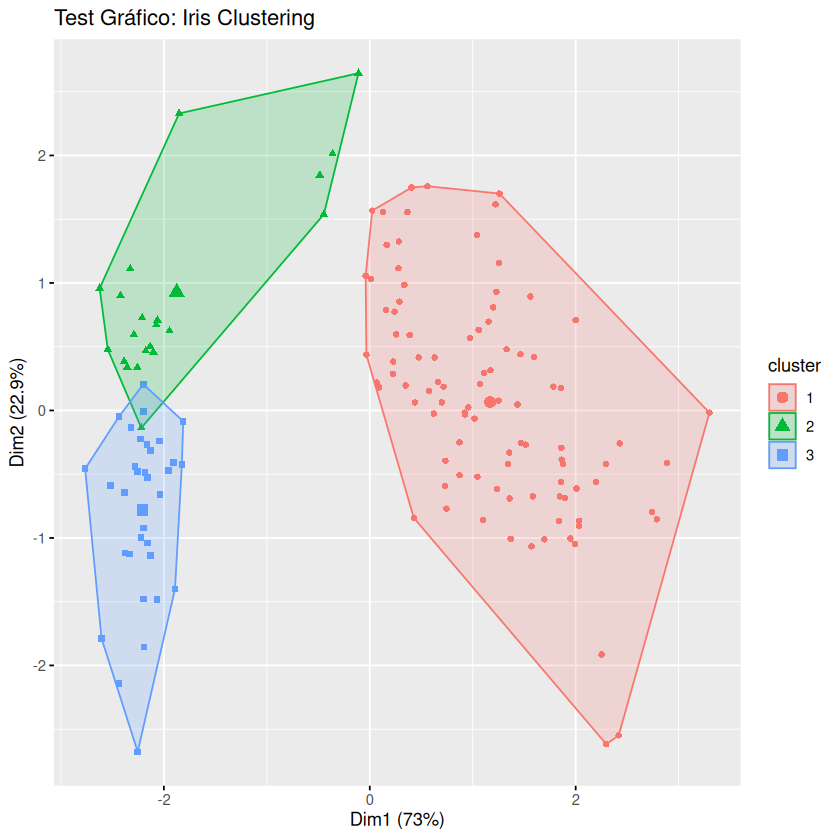

In [20]:
# --- 1. Información de la Sesión ---
print(R.version.string)

# --- 2. Verificación de Instalación ---
# Lista ajustada al Dockerfile optimizado (sin clv ni httppgd)
paquetes_check <- c(
  "IRkernel", "corrplot", "NbClust", "MASS", "factoextra", 
  "colorspace", "sp", "sf", "ggplot2", 
  "tidyverse", "caret", "psych", "GGally"
)

# Creamos la tabla de estado
verificacion <- data.frame(
  Paquete = paquetes_check,
  Instalado = paquetes_check %in% installed.packages()[, "Package"],
  Version = sapply(paquetes_check, function(p) {
    if (p %in% installed.packages()[, "Package"]) {
      as.character(packageVersion(p)) 
    } else {
      "NO INSTALADO"
    }
  })
)

print(verificacion)

# --- 3. Test de Carga Crítico (Tidyverse & ML) ---
cat("\n--- INICIANDO TEST DE CARGA ---\n")
tryCatch({
    library(tidyverse)
    library(caret)
    cat("✅ Tidyverse y Caret cargados correctamente.\n")
}, error = function(e) {
    cat("❌ ERROR CRÍTICO cargando Tidyverse/Caret:\n", e$message)
})

# --- 4. Test Geoespacial (El más importante) ---
# Si sf carga, GDAL/GEOS/PROJ están bien configurados en Linux
tryCatch({
    library(sf)
    # Crear un punto simple para probar GDAL
    punto <- st_point(c(1, 1))
    cat("✅ Librería espacial 'sf' cargada y funcional (GDAL linkeado).\n")
}, error = function(e) {
    cat("❌ ERROR CRÍTICO con 'sf' (Faltan librerías del sistema):\n", e$message)
})

# --- 5. Test Visual (Renderizado en Jupyter) ---
cat("Generando gráfico de prueba...\n")
library(factoextra)
data(iris)
km.res <- kmeans(iris[, -5], 3)
# Esto debería mostrar un gráfico debajo de la celda
fviz_cluster(km.res, data = iris[, -5], 
             geom = "point", 
             main = "Test Gráfico: Iris Clustering")


## 1) Variables y asignación (`<-`)

En Python usáis `=` para asignar valores a variables.
En R, **también existe `=`**, pero **la forma recomendada por la comunidad es usar `<-`**.

Este operador se lee como *“recibe”*:

> la variable **recibe** el valor que hay a la derecha.

Por ejemplo:

```r
edad <- 19
```

💡 **Consejo práctico**:
En la mayoría de editores (RStudio, Jupyter, Colab), puedes escribir `<-` pulsando **Alt + -**, así es más rápido y cómodo.

En este curso **usaremos siempre `<-`**, para seguir el estándar profesional de R y evitar confusiones más adelante.

Ejecuta la siguiente celda y observa el resultado.

In [21]:
nombre <- "Ana"
edad <- 19 

nombre
edad


[1] "Ana"

[1] 19

### 🔧 Ejercicio 1
Crea dos variables:
- `dataset`: El nombre de un conjunto de datos que vas a usar (por ejemplo: "Iris", "Titanic" o "MNIST").
- `tasa_aprendizaje`: Un número decimal que represente la velocidad a la que aprende el modelo (por ejemplo: 0.001)

Después, **muestra** ambas variables.


In [22]:
# TODO: completa

dataset <- "Iris"

tasa_aprendizaje <- 0.0001

dataset
tasa_aprendizaje

[1] "Iris"

[1] 1e-04

## 2)  Cómo se estructura el código en R

Si vienes de Python, hay una diferencia **muy importante** que debes conocer desde ya:

### En R la indentación NO define bloques de código

En **Python**, el espacio (la indentación) es lo que le dice al programa qué parte del código pertenece a una condición o un bucle:

```python
if accuracy >= 5:
   clase = "Positivo"
else:
    clase = "Negativo"
```

En **R**, lo que define un bloque son **las llaves `{}`**, no los espacios. El intérprete de R busca el cierre de la llave para saber dónde termina la instrucción.

```r
if (accuracy >= 5) {
  clase <- "Positivo"
} else {
  clase <- "Negativo"
}
```

### Reglas de oro en entornos de Datos:

* **Las llaves `{}**` son obligatorias si vas a ejecutar varias acciones tras una condición (por ejemplo, clasificar y luego registrar un log).
* **Legibilidad:** En scripts de producción de ML, la indentación es sagrada para que otros científicos de datos puedan auditar tu lógica.

---

### ⚠️ Ejemplo de "Código Críptico" en ML

R permite compactar el código de una forma que en Python sería imposible (pero que dificulta mucho el *debugging*). Este ejemplo **funciona**, pero es una mala práctica:

In [23]:
prob <- 0.82 
if(prob>0.5){clase<-"Spam"}else{clase<-"Ham"}

> **Tip de experto:** Si estás trabajando en RStudio, puedes usar el atajo `Ctrl + Shift + A` para que el editor limpie y ordene automáticamente tus llaves e indentaciones.

Ejemplo correcto y profesional:


In [24]:
prob <- 0.82

if(prob>0.5){
  clase<-"Spam"
} else{
  clase<-"Ham"
}

## 3) Tipos de datos en el contexto de ML

En R, cada columna de un dataset de Machine Learning tiene un tipo de dato. Si el tipo es incorrecto, el modelo no podrá entrenar.

Los tipos fundamentales son:

* **Numérico** (`numeric`) → Representa **características continuas** (como el precio de una casa o el peso de una persona).
* Ejemplo: `25.5`, `1.80`, `-0.004`


* **Entero** (`integer`) → Representa **conteos** (como el número de habitaciones o clics en un anuncio).
* Ejemplo: `3L`, `100L`


* **Texto** (`character`) → Representa **categorías o etiquetas** (como nombres de ciudades o tipos de flores).
* Ejemplo: `"Iris setosa"`, `"Crédito Aprobado"`


* **Lógico** (`logical`) → Representa **indicadores binarios** (¿Es un fraude?, ¿Tiene seguro?).
* Ejemplo: `TRUE`, `FALSE`



---

### Ver el tipo de una variable

En ciencia de datos, lo primero que hacemos al cargar un dataset es revisar sus tipos con `class()`:

```r
class(dataset$target)

```

Esto es vital para:

* **Entender errores:** Por ejemplo, intentar calcular la media de una columna que R cree que es texto.
* **Depurar modelos:** Asegurarse de que el modelo de clasificación reciba valores lógicos o categorías, no números sueltos.

---

### El "choque" con Python: El decimal por defecto

En **Python**, si haces `a = 3`, el sistema suele inferir que es un `int`.
En **R**, si haces `a <- 3`, **R lo guarda como `numeric` (decimal)**.

> **¿Por qué importa en IA?**
> R prioriza la precisión estadística. En modelos complejos (como regresiones lineales), casi todos los cálculos requieren decimales, por lo que R prefiere tenerlos listos desde el principio.

---

### Optimización: La "L" de Large Datasets

Para indicar que un número es un **entero puro**, añadimos una **L**:

```r
id_usuario <- 5420L

```

En **Big Data** o modelos con millones de filas, usar `integer` en lugar de `numeric` puede reducir el consumo de memoria de tus vectores a la mitad. En IA, ¡la eficiencia es clave!

---

### 💡 Idea clave:

> En R, los números son "habitantes del mundo decimal" a menos que les pongas el pasaporte de la **L**.

---

### Ejemplo completo






In [25]:
a <- 3
b <- 3L
c <- "hola"
d <- TRUE

class(a)  # numeric
class(b)  # integer
class(c)  # character
class(d)  # logical

[1] "numeric"

[1] "integer"

[1] "character"

[1] "logical"

---

⚠️ **Error típico**
Pensar que `3` y `3L` son exactamente lo mismo.
No lo son: tienen el mismo valor, pero **no el mismo tipo**.

---

In [26]:
a <- 3.14
b <- 3L
c <- "hola"
d <- TRUE

class(a)
class(b)
class(c)
class(d)


[1] "numeric"

[1] "integer"

[1] "character"

[1] "logical"

---

### 🔧 Ejercicio 2: Clasificador de Riesgo (Detección de Fraude)

En Machine Learning, los modelos de detección de fraude suelen devolver un "Score de Riesgo". Tu tarea es crear un pequeño motor de decisión lógica.

1. Crea una variable llamada `score_riesgo` y asígnale un valor numérico entre 0 y 100 (por ejemplo: `72`).
2. Crea una variable llamada `es_fraude` que use una comparación lógica:
* Será `TRUE` si el `score_riesgo` es mayor o igual a **80** (umbral de alerta).
* Será `FALSE` si es menor de 80.


3. Muestra por pantalla el valor de `es_fraude`.
4. Comprueba el tipo de dato de `es_fraude` usando la función `class()`.


In [27]:
# TODO: completa

score_riesgo <- 42.32

if(score_riesgo>=80){
    es_fraude <- TRUE
}else {
   es_fraude <- FALSE
}

es_fraude
class(es_fraude)

[1] FALSE

[1] "logical"


## 4) Operaciones matemáticas: El motor de la IA

R es, en esencia, un lenguaje estadístico. Cualquier algoritmo de Machine Learning (desde una regresión hasta una red neuronal) no es más que una **sucesión masiva de operaciones matemáticas**.

Las operaciones básicas son tus herramientas para medir el error de un modelo:

* **Suma** → `+`
* **Resta** → `-` (Útil para calcular el **residuo**: la diferencia entre lo real y lo predicho).
* **Multiplicación** → `*` (Usada para aplicar **pesos** a las variables).
* **División** → `/` (Para normalizar datos o calcular porcentajes de acierto).
* **Potencia** → `^` (Fundamental para calcular el **Error Cuadrático**, que penaliza los errores grandes).

---


### Ejemplo





In [28]:
x <- 10
y <- 4

x + y
x - y
x * y
x / y
x ^ y


[1] 14

[1] 6

[1] 40

[1] 2.5

[1] 10000



### Orden de las operaciones (Precedencia)

En IA, el orden de los factores **sí altera el producto**. R sigue el estándar matemático:

1. **Paréntesis** `()` → ¡Úsalos siempre para asegurar que tu fórmula de ML sea correcta!
2. **Potencias** `^`
3. **Multiplicación/División** `*` `/`
4. **Suma/Resta** `+` `-`

Ejemplo aplicado (Cálculo de error):

```r
real <- 10
predicho <- 8

# Error al cuadrado: (10 - 8)^2 = 4
(real - predicho) ^ 2 

```

---

💡 **Idea clave para IA**
No veas estas operaciones como "aritmética de primaria". En Machine Learning, la **resta** es la base para saber cuánto se equivocó el modelo, y la **potencia** es la herramienta para castigar esos errores. Si dominas esto, entenderás cómo "aprende" una IA.

---

### 🔧 Ejercicio 3: Calculando el Error de Predicción

Imagina que tu modelo de ML predijo que una casa valía **200,000€**, pero se vendió por **220,000€**.

1. Crea la variable `precio_real <- 220000`.
2. Crea la variable `precio_predicho <- 200000`.
3. Calcula el **error porcentual** con la siguiente fórmula:

$$Error = \frac{Precio\_Real - Precio\_Predicho}{Precio\_Real} \times 100$$

4. Muestra el resultado.

In [29]:
# TODO: completa

precio_real <- 220000
precio_predicho <- 200000

error <- ((precio_real - precio_predicho) / precio_real) * 100

error


[1] 9.090909


## 5) Funciones útiles: `print()` y `paste()`

En R usamos **funciones** para realizar tareas concretas. Al trabajar con Machine Learning, las usaremos constantemente para monitorizar el entrenamiento de nuestros modelos y generar reportes de métricas.

---

### `print()`: Ver resultados

La función `print()` **muestra un valor u objeto por pantalla**. Aunque en la consola de R basta con escribir el nombre de la variable para ver su contenido, usar `print()` dentro de scripts o bucles de entrenamiento es una mejor práctica.


In [30]:
precision <- 0.945
print(precision)

[1] 0.945


💡 **Nota de experto:**
En R, `print()` en realidad es una función "genérica". Esto significa que si le pasas un modelo de IA entero (como un Bosque Aleatorio), no te mostrará solo un número, sino un **resumen técnico** de todo el modelo.

---

### `paste()` y `paste0()`: Construir reportes

La función `paste()` sirve para **unir textos y variables**. En IA es vital para crear mensajes dinámicos que nos informen sobre el estado de un experimento.


In [31]:
algoritmo <- "XGBoost"
paste("Ejecutando el modelo:", algoritmo)
# Resultado: "Ejecutando el modelo: XGBoost"

[1] "Ejecutando el modelo: XGBoost"

#### Diferencia de separadores:

1. **`paste()`**: Añade un **espacio** por defecto entre elementos. Puedes cambiarlo con el argumento `sep`.
2. **`paste0()`**: Es una versión rápida que pega todo **sin espacios**. Es la favorita de los Data Scientists para crear nombres de archivos (ej: `modelo_v1.rds`).

In [32]:
# Ejemplo con separador personalizado
paste("Precisión", "0.92", sep = ": ") # "Precisión: 0.92"

# Ejemplo con paste0 para archivos de datos
version <- 2
paste0("resultado_experimento_v", version, ".csv") # "resultado_experimento_v2.csv"


[1] "Precisión: 0.92"

[1] "resultado_experimento_v2.csv"

---

💡 **Idea clave para IA**
`paste()` es tu herramienta de **comunicación**. Se usa para generar logs automáticos: *"Iniciando entrenamiento en el nodo 1..."* o *"Alerta: la pérdida del modelo es superior a 0.5"*.

---



### 🔧 Ejercicio 4 — Reporte de Evaluación de IA

Imagina que acabas de validar un modelo de clasificación de imágenes. Crea las siguientes variables:

* `modelo`: El nombre de tu algoritmo (ej: `"ResNet50"`).
* `precision`: Un valor decimal (ej: `0.88`).
* `dataset`: El nombre de tu conjunto de datos (ej: `"CIFAR-10"`).

Usa la función `paste()` para **mostrar** por pantalla un mensaje con este formato:

> *"El modelo [modelo], entrenado con el dataset [dataset], tiene una precisión de [precision]."*

---

In [33]:
# TODO: completa

modelo <- "ResNet50"
precision <- 0.88
dataset <- "CIFAR-10"

paste("El modelo ", modelo, ", entrenado con el dataset ", dataset, ", tiene una precision de ", precision)



[1] "El modelo  ResNet50 , entrenado con el dataset  CIFAR-10 , tiene una precision de  0.88"

## 7) El sistema de ayuda en R

En Machine Learning, es imposible recordar todos los parámetros de cada algoritmo. R tiene un sistema de ayuda integrado que es incluso más directo que el de Python.

La forma más rápida de consultar la documentación es escribir **`?` delante del nombre de la función**.

```r
?sd  # Consultar la desviación estándar

```

Esto abrirá el panel de **Help** con la documentación oficial.

---

### ¿Cómo leer la ayuda como un Data Scientist?

Cuando abras la ayuda de una función de IA, fíjate siempre en estas secciones clave:

1. **Description**: Qué hace realmente el algoritmo.
2. **Usage**: Cómo se escribe la función y cuáles son sus valores por defecto.
3. **Arguments**: Qué significan parámetros como `ntree` (número de árboles) o `k` (vecinos).
4. **Examples**: Fragmentos de código listos para copiar y probar.

> **Dato clave:** Muchas funciones de R tienen parámetros opcionales. Por ejemplo, en ML es común usar `na.rm = TRUE` para que el modelo no falle si faltan datos (valores `NA`).

---

### Otras formas de pedir ayuda

Si no recuerdas el nombre exacto de la función, puedes usar la búsqueda por palabra clave con doble signo de interrogación:

In [34]:
help(glm)      # Equivalente a ?glm
??regression   # Busca funciones relacionadas con "regresión" en todos tus paquetes


glm                   package:stats                    R Documentation

_F_i_t_t_i_n_g _G_e_n_e_r_a_l_i_z_e_d _L_i_n_e_a_r _M_o_d_e_l_s

_D_e_s_c_r_i_p_t_i_o_n:

     ‘glm’ is used to fit generalized linear models, specified by
     giving a symbolic description of the linear predictor and a
     description of the error distribution.

_U_s_a_g_e:

     glm(formula, family = gaussian, data, weights, subset,
         na.action, start = NULL, etastart, mustart, offset,
         control = list(...), model = TRUE, method = "glm.fit",
         x = FALSE, y = TRUE, singular.ok = TRUE, contrasts = NULL, ...)
     
     glm.fit(x, y, weights = rep.int(1, nobs),
             start = NULL, etastart = NULL, mustart = NULL,
             offset = rep.int(0, nobs), family = gaussian(),
             control = list(), intercept = TRUE, singular.ok = TRUE)
     
     ## S3 method for class 'glm'
     weights(object, type = c("prior", "working"), ...)
     


R Information

Vignettes with name or keyword or title matching ‘regression’ using
fuzzy matching:


e1071::svmdoc           Support Vector Machines---the Interface to
                        libsvm in package e1071
  Concepts: regression
e1071::svminternals     svm() internals
  Concepts: regression
lmtest::`lmtest-intro`
                        Diagnostic Checking in Regression Relationships


Type 'vignette(PKG::FOO)' to inspect entries 'PKG::FOO'.



Demos with name or title matching ‘regression’ using fuzzy matching:


SparseM::LeastSquares   Least Squares Linear Regression
SQUAREM::mmlogistic     Examples of MM acceleration for Logistics
                        Regression Maximum Likelihood Estimation.


Type 'demo(PKG::FOO)' to run demonstration 'PKG::FOO'.



Help files with alias or concept or title matching ‘regression’ using
fuzzy matching:


boot::cv.glm            Cross-validation for Generalized Linear Models
  Concepts: Regression
boot::glm.diag          Generalized Line

---

**Consejo profesional en IA**
La documentación de R es famosa por ser muy técnica. No te agobies si no entiendes todo al principio. Ve directo a la sección de **Examples** al final de la página; suele ser la forma más rápida de entender cómo aplicar un modelo a tus datos.


### 🔧 Ejercicio 5: Explorando la Variabilidad

En Machine Learning, la **desviación estándar** nos indica qué tan dispersos están nuestros datos (clave para detectar *outliers*).

1. Abre la ayuda de la función `sd()`.
2. Busca en la sección **Arguments** qué significa el parámetro `na.rm`.
3. **Pregunta bonus:** Imagina que tienes un dataset con edades y falta un dato. Si `na.rm` es `FALSE` (valor por defecto), ¿qué crees que pasará al calcular la desviación?

In [35]:
# TODO: completa
?sd

sd                    package:stats                    R Documentation

_S_t_a_n_d_a_r_d _D_e_v_i_a_t_i_o_n

_D_e_s_c_r_i_p_t_i_o_n:

     This function computes the standard deviation of the values in
     ‘x’.  If ‘na.rm’ is ‘TRUE’ then missing values are removed before
     computation proceeds.

_U_s_a_g_e:

     sd(x, na.rm = FALSE)
     
_A_r_g_u_m_e_n_t_s:

       x: a numeric vector or an R object but not a ‘factor’ coercible
          to numeric by ‘as.double(x)’.

   na.rm: logical.  Should missing values be removed?

_D_e_t_a_i_l_s:

     Like ‘var’ this uses denominator n - 1.

     The standard deviation of a length-one or zero-length vector is
     ‘NA’.

_S_e_e _A_l_s_o:

     ‘var’ for its square, and ‘mad’, the most robust alternative.

_E_x_a_m_p_l_e_s:

     sd(1:2) ^ 2
     

---

##  Mini-reto — Normalización de un valor (IA)

En Machine Learning, si intentas comparar el "Precio de una casa" (ej: 300,000) con el "Número de habitaciones" (ej: 3), el modelo se confundirá por la diferencia de escalas. Para solucionarlo, usamos la **Normalización Min-Max**, que comprime todos los valores a un rango entre **0 y 1**.

La fórmula matemática es:

$
valorNormalizado = \frac{valor - minimo}{maximo - minimo}
$

---

###  Enunciado


Imagina que estás normalizando la columna de "Ingresos" de un dataset:

1. **Crea tres variables**:
* `valor`: Asígnale un ingreso de `50000`.
* `minimo`: El ingreso mínimo en tu dataset es `10000`.
* `maximo`: El ingreso máximo es `90000`.


2. **Calcula el valor normalizado**: Usa la fórmula anterior y guarda el resultado en una variable llamada `valor_norm`. *¡Cuidado con los paréntesis!*
3. **Muestra el resultado**: Usa la función `print()` y `paste()` para mostrar un mensaje tipo: *"El valor normalizado es: [resultado]"*.
4. **Verificación**: Comprueba con `class()` que el resultado sea de tipo `numeric`.

---

### 💡 Tip de experto

En R, cuando trabajas con datasets reales, no harás esto valor por valor. Aplicarás esta misma lógica a **vectores enteros** (columnas) para transformar miles de datos en una sola línea de código.






In [36]:
valor <- 50000
maximo <- 90000
minimo <- 10000

valor_norm <- (valor - minimo) / (maximo - minimo)

print(valor_norm)
class(valor_norm)



[1] 0.5


[1] "numeric"